In [57]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os

%matplotlib inline

In [58]:
train_path = "/kaggle/input/cotton-disease-dataset/Cotton Disease/train"
test_path = "/kaggle/input/cotton-disease-dataset/Cotton Disease/test"
validation_path = "/kaggle/input/cotton-disease-dataset/Cotton Disease/val"

In [59]:
images = []
def load_images_from_folder(folder):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return len(images)

load_images_from_folder("/kaggle/input/cotton-disease-dataset/Cotton Disease/train/diseased cotton leaf")

288

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16,vgg19

**Vgg16 Preprocessing**

In [61]:
train_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant'],batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)\
    .flow_from_directory(directory=validation_path,target_size=(224,224),classes=['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant'],batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant'],batch_size=10,shuffle=False)

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


**Vgg19 Preprocessing**

In [67]:
train_batches = ImageDataGenerator(preprocessing_function=vgg19.preprocess_input)\
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant'],batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=vgg19.preprocess_input)\
    .flow_from_directory(directory=validation_path,target_size=(224,224),classes=['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant'],batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=vgg19.preprocess_input)\
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant'],batch_size=10,shuffle=False)

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [89]:
imgs,labels = next(train_batches)
test_imgs,test_labels = next(test_batches)

In [90]:
def plot_images(images):
    fig,axes = plt.subplots(1,3,figsize=(10,10))
    axes = axes.flatten()
    for img,ax in zip(images,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [95]:
# plot_images(imgs)
imgs.shape

(10, 299, 299, 3)

In [92]:
vgg16_model = vgg16.VGG16()
vgg19_model = vgg19.VGG19()

In [ ]:
vgg16_model.summary()

In [72]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,\
    Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam

model = Sequential()
for layer in vgg19_model.layers[:-1]:
    model.add(layer)
    
for layer in model.layers:
    layer.trainable = False

In [76]:
model.add(Dense(units=4,activation="softmax"))

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [78]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=['accuracy'])

In [79]:
model.fit(x = train_batches,
          validation_data=valid_batches,
         steps_per_epoch=len(train_batches),
         epochs=5,
         verbose=2)

Epoch 1/5
196/196 - 18s - loss: 0.8352 - accuracy: 0.6402 - val_loss: 0.5850 - val_accuracy: 0.7470
Epoch 2/5
196/196 - 18s - loss: 0.4644 - accuracy: 0.8293 - val_loss: 0.4568 - val_accuracy: 0.8103
Epoch 3/5
196/196 - 18s - loss: 0.3748 - accuracy: 0.8672 - val_loss: 0.3953 - val_accuracy: 0.8419
Epoch 4/5
196/196 - 18s - loss: 0.3285 - accuracy: 0.8842 - val_loss: 0.3518 - val_accuracy: 0.8656
Epoch 5/5
196/196 - 18s - loss: 0.2952 - accuracy: 0.8985 - val_loss: 0.3557 - val_accuracy: 0.8498


In [80]:
prediction = model.predict(x = test_batches,steps= len(test_batches),verbose=0)

In [81]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [82]:
np.argmax(prediction,axis=-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 3, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 3, 3, 1, 3, 1,
       1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Confusion matrix, without normalization
[[19  0  6  0]
 [ 0 27  0  1]
 [ 3  0 22  1]
 [ 0  6  0 21]]


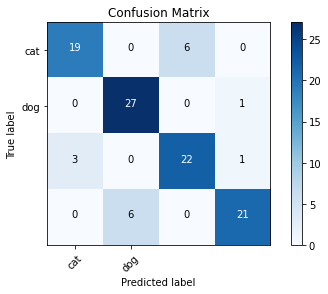

In [83]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(prediction,axis=-1))
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

**VGG16 model - ~91% accuracy**

**VGG19 model - ~89% accuracy**